In [1]:
using Printf, LinearAlgebra
using JLD2, CairoMakie

include("../../MyTwoLayerNN/MyTwoLayerNN.jl")
using .MyTwoLayerNN

In [147]:
set_theme!(theme_latexfonts()) # Theme for plots 
update_theme!(Theme(fontsize = 36)) # 18 for testing and 36 for report

In [148]:
DATA_FOLDER = "leaky relu"
MYORANGE = Makie.RGB(213/255, 94/255, 0/255)

In [220]:
leakyconstant = "0.0"
data = load(joinpath(@__DIR__, DATA_FOLDER, "run c=$leakyconstant.jld2")) # Default data

td = data["trainingData"]
nn = data["trainedNN"]
inn = data["initNN"]

TwoLayerNN{Float64, Main.MyTwoLayerNN.var"#1#3"{Float64}, Main.MyTwoLayerNN.var"#2#4"{Float64}}([0.8082879284649668; -1.1220725081141734; … ; -1.2505328746000024; -0.3463702447057351;;], [18.917124540512955, -31.861024552614538, 62.58884298324039, -10.948432399299671, 39.714989488526655, 1.127242670239639, 26.848498835067073, 29.19192366897047, 30.79006819891071, -11.414319804548574  …  29.197243010134805, -31.93422421154445, -0.7135753100049836, 19.896136617387572, -2.967641697389466, 1.1921074581629545, -49.24503437631759, -26.78932300726456, -52.34489170154903, -59.60358724789226], [-1.2778929042682445, 1.3458458389777976, 0.5349715054489175, 1.7445216472908298, -0.94562442319331, -0.257833652705556, 1.0155900103675077, -0.9748654504001906, -0.5250116933467154, 1.3515697216872853  …  0.03839914442190294, -0.4111467572130697, -0.25802506459434893, -0.4435302225201445, -0.12243304520494255, 0.1320432249518399, -0.1891516619677945, 0.9918812907173121, 0.13715215788415805, 1.70663164473

In [221]:
xdata = td.x |> Iterators.flatten |> collect
ydata = td.y

4-element Vector{Float64}:
 0.25
 0.03333333333333333
 0.03333333333333333
 0.25

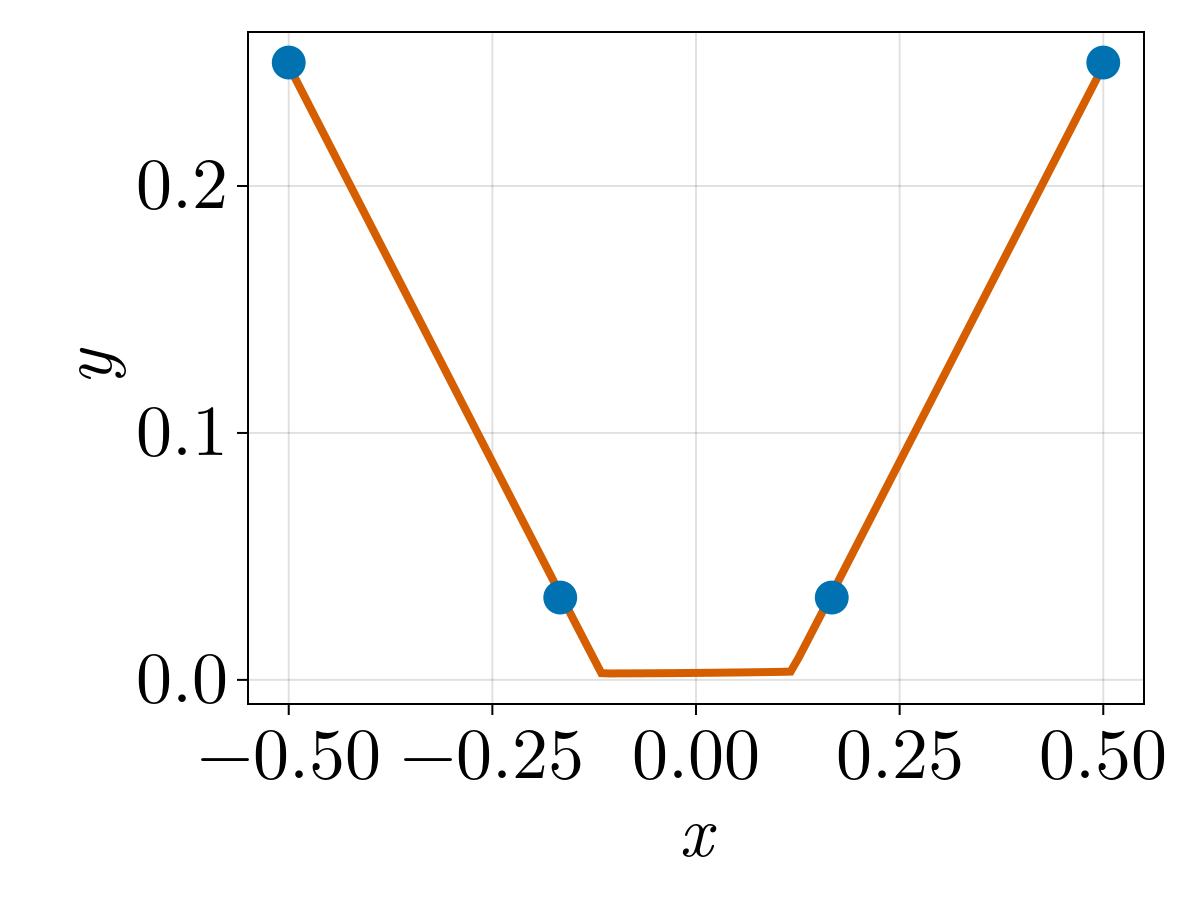

In [250]:
f = Figure()

ax = Axis(f[1, 1], xlabel = L"x", ylabel = L"y", xticks = -0.5:0.25:0.5)

# Draw NN graph
xgrid = range(-0.5, 0.5, length = 100)
lines!(ax, xgrid, [forward(nn, p) for p in xgrid]; color=MYORANGE, linewidth=4)

# Scatter data points
scatter!(ax, xdata, ydata; markersize = 24)

# Some more settings
xlims!(ax, -0.5 * 1.1, 0.5 * 1.1)

colsize!(f.layout, 1, Aspect(1, 4/3))

f

In [251]:
save("line c=$leakyconstant.pdf", f)

CairoMakie.Screen{PDF}


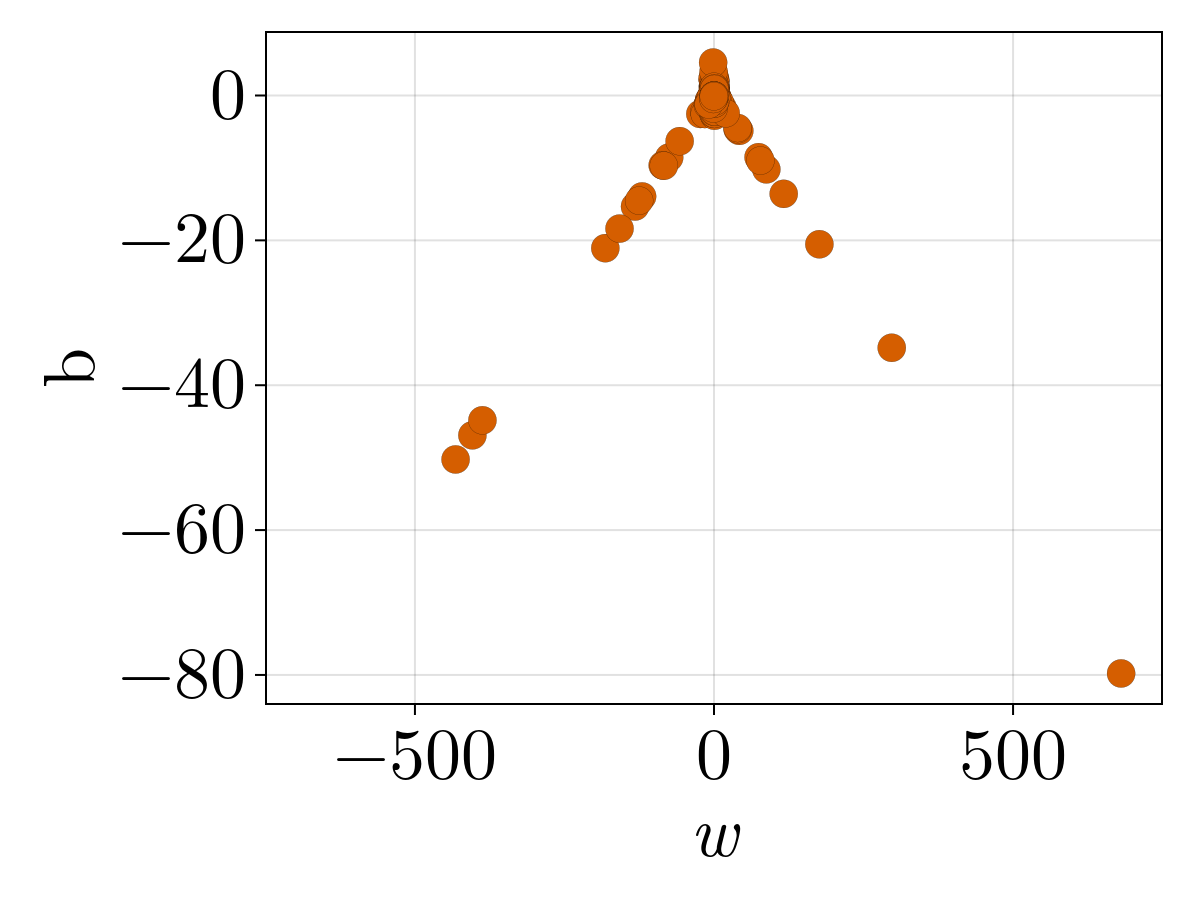

In [252]:
g = Figure()

ax = Axis(g[1, 1], xlabel=L"w", ylabel="b")

# Plot the inflection points
xcoords = vec(@. - nn.b / nn.w)
ycoords = vec(@. abs(nn.a) * sqrt.(nn.b^2 + nn.w^2))

# scatter!(ax, xcoords, ycoords)
scatter!(ax, vec(nn.w), nn.b; markersize=20, strokewidth=0.1, color=MYORANGE)

# Some more settings 
xlims!(ax, -749, 749) # c=0.0
# xlims!(ax, -460 * 1.1, 460 * 1.1) # c=0.5
# xlims!(ax, -2500 * 1.75, 2500 * 1.75) # c=0.99

colsize!(g.layout, 1, Aspect(1, 4/3))

g

In [253]:
save("scat c=$leakyconstant.pdf", g)

CairoMakie.Screen{PDF}


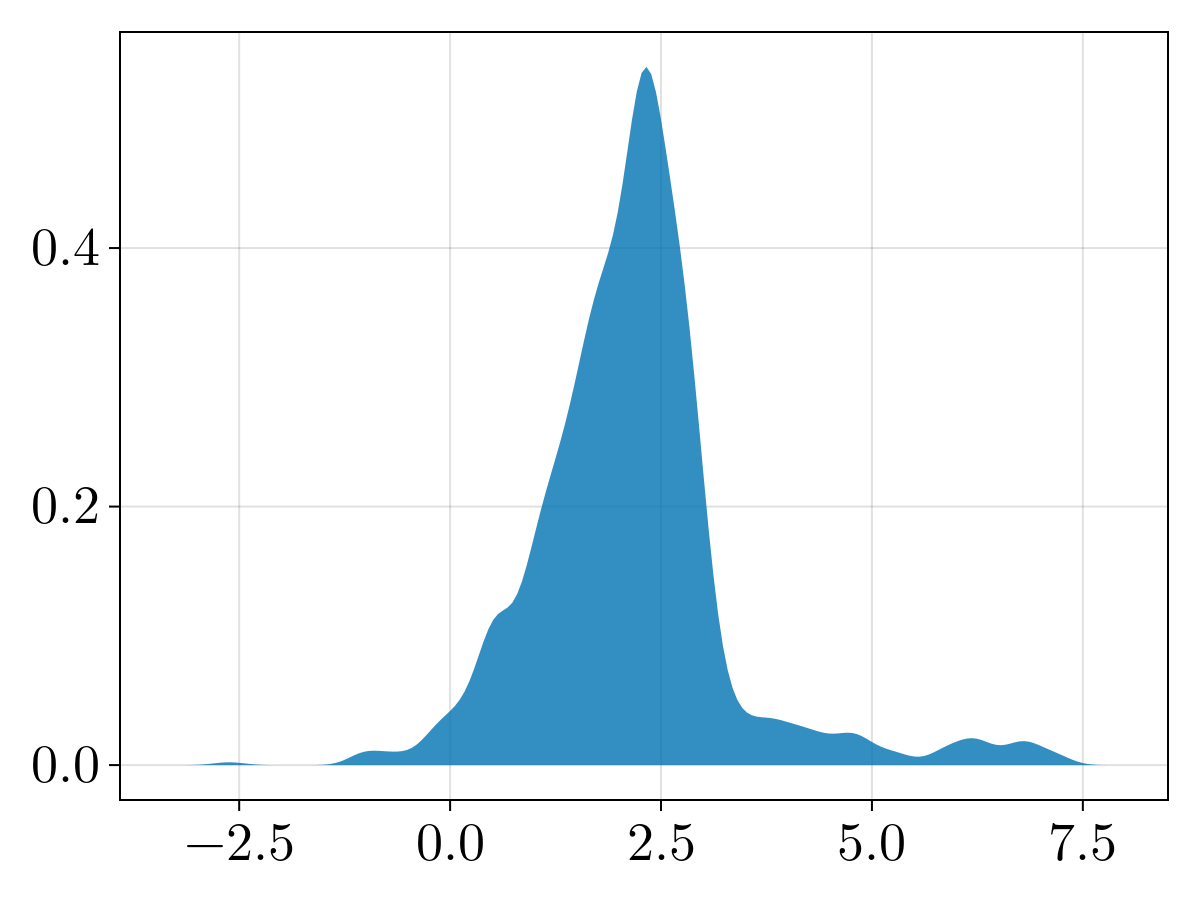

In [103]:
g = Figure()

ax = Axis(g[1, 1])

number_of_neurons = length(nn.w)
# boxplot!(ax, ones(Bool, number_of_neurons), ycoords .|> log10)
density!(ax, ycoords .|> log10)

g